In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [133]:
df = pd.read_csv("lithium_battery_materials.csv")
df = df.drop(["material_id"],axis = 1)
df

,formula_pretty,n_elements,contains_transition_metal,formation_energy_per_atom,energy_per_atom,band_gap,is_semiconductor,density,volume,elements
0,LiO8,2,False,1.720359,0.654797,-0.765226,False,-1.181862,-0.911997,"['Li', 'O']"
1,LiO8,2,False,1.719137,0.654475,-0.808019,False,-1.237528,-0.897719,"['Li', 'O']"
2,LiS4,2,False,1.902530,0.036938,0.626478,True,-2.352166,4.289055,"['Li', 'S']"
3,LiS4,2,False,1.499043,0.862733,0.620655,True,-2.367226,4.875701,"['Li', 'S']"
4,LiSn,2,False,1.813196,1.158327,-0.868213,False,0.894787,-0.882882,"['Li', 'Sn']"
...,...,...,...,...,...,...,...,...,...,...
86983,Li48P16S61,3,False,0.890142,0.773741,0.686062,True,-1.344163,6.430479,"['Li', 'P', 'S']"
86984,Li49Cu8N19,3,False,1.686606,0.543630,-0.868213,False,-1.028787,1.177355,"['Cu', 'Li', 'N']"
86985,Li66Be24H35,3,False,2.117250,1.320546,-0.868213,False,-1.966237,2.955622,"['Be', 'H', 'Li']"
86986,Ba39Li80N9,3,False,2.097097,1.405895,-0.868213,False,-0.814328,10.189519,"['Ba', 'Li', 'N']"


In [134]:
df.isnull().any()

,0
formula_pretty,False
n_elements,False
contains_transition_metal,False
formation_energy_per_atom,False
energy_per_atom,False
band_gap,False
is_semiconductor,False
density,False
volume,False
elements,False


In [135]:
df.describe()

,n_elements,formation_energy_per_atom,energy_per_atom,band_gap,density,volume
count,86988.000000,8.698800e+04,8.698800e+04,8.698800e+04,8.698800e+04,8.698800e+04
mean,3.886099,8.628976e-15,8.820440e-15,7.784048e-15,-1.248506e-14,-1.394490e-14
std,0.746630,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00
min,2.000000,-2.333873e+00,-1.662359e+01,-8.682129e-01,-2.477204e+00,-1.194165e+00
25%,3.000000,-6.245452e-01,-1.117969e-01,-8.682129e-01,-5.720758e-01,-6.209157e-01
50%,4.000000,-2.581734e-01,6.315191e-02,-3.681771e-01,-1.676467e-01,-3.418060e-01
75%,4.000000,2.759976e-01,2.902369e-01,6.349414e-01,3.265572e-01,3.349606e-01
max,8.000000,7.952180e+00,2.055498e+00,5.033428e+00,1.032946e+01,1.992366e+01


In [136]:
def func(b):
...  c = 0
...  i = 0
...  while i < len(b):
...         if i>0 and b[i].isupper():
...             if not b[i-1].isdecimal() or (i+1) == len(b):
...                 c = c + 1
...         if b[i].isdecimal():
...             if b[i:i+2].isdecimal():
...                 if b[i:i+3].isdecimal():
...                     c = c + int(b[i:i+3])
...                     i = i + 3
...                 else:
...                     c = c + int(b[i:i+2])
...                     i = i + 2
...             else:
...                 c = c + int(b[i])
...         i = i + 1
...  return c

df["No_of_Atoms"] = df["formula_pretty"].apply(lambda x :func(x))
df

,formula_pretty,n_elements,contains_transition_metal,formation_energy_per_atom,energy_per_atom,band_gap,is_semiconductor,density,volume,elements,No_of_Atoms
0,LiO8,2,False,1.720359,0.654797,-0.765226,False,-1.181862,-0.911997,"['Li', 'O']",9
1,LiO8,2,False,1.719137,0.654475,-0.808019,False,-1.237528,-0.897719,"['Li', 'O']",9
2,LiS4,2,False,1.902530,0.036938,0.626478,True,-2.352166,4.289055,"['Li', 'S']",5
3,LiS4,2,False,1.499043,0.862733,0.620655,True,-2.367226,4.875701,"['Li', 'S']",5
4,LiSn,2,False,1.813196,1.158327,-0.868213,False,0.894787,-0.882882,"['Li', 'Sn']",1
...,...,...,...,...,...,...,...,...,...,...,...
86983,Li48P16S61,3,False,0.890142,0.773741,0.686062,True,-1.344163,6.430479,"['Li', 'P', 'S']",125
86984,Li49Cu8N19,3,False,1.686606,0.543630,-0.868213,False,-1.028787,1.177355,"['Cu', 'Li', 'N']",76
86985,Li66Be24H35,3,False,2.117250,1.320546,-0.868213,False,-1.966237,2.955622,"['Be', 'H', 'Li']",125
86986,Ba39Li80N9,3,False,2.097097,1.405895,-0.868213,False,-0.814328,10.189519,"['Ba', 'Li', 'N']",128


In [137]:
df = df.drop(["formula_pretty"],axis = 1)
df

,n_elements,contains_transition_metal,formation_energy_per_atom,energy_per_atom,band_gap,is_semiconductor,density,volume,elements,No_of_Atoms
0,2,False,1.720359,0.654797,-0.765226,False,-1.181862,-0.911997,"['Li', 'O']",9
1,2,False,1.719137,0.654475,-0.808019,False,-1.237528,-0.897719,"['Li', 'O']",9
2,2,False,1.902530,0.036938,0.626478,True,-2.352166,4.289055,"['Li', 'S']",5
3,2,False,1.499043,0.862733,0.620655,True,-2.367226,4.875701,"['Li', 'S']",5
4,2,False,1.813196,1.158327,-0.868213,False,0.894787,-0.882882,"['Li', 'Sn']",1
...,...,...,...,...,...,...,...,...,...,...
86983,3,False,0.890142,0.773741,0.686062,True,-1.344163,6.430479,"['Li', 'P', 'S']",125
86984,3,False,1.686606,0.543630,-0.868213,False,-1.028787,1.177355,"['Cu', 'Li', 'N']",76
86985,3,False,2.117250,1.320546,-0.868213,False,-1.966237,2.955622,"['Be', 'H', 'Li']",125
86986,3,False,2.097097,1.405895,-0.868213,False,-0.814328,10.189519,"['Ba', 'Li', 'N']",128


In [138]:
df["elements"] = df["elements"].apply(lambda x : eval(x)) # Making the values in element column non-string

In [139]:
elem_wit_freq = df[df["is_semiconductor"]==True]["elements"].apply(lambda x : ",".join(x)).str.get_dummies(sep = ",").cumsum().iloc[-1,:].to_dict()

# Extracting only those samples corresponding to semi-conductor materials

Text(0, 0.5, 'Frequency')

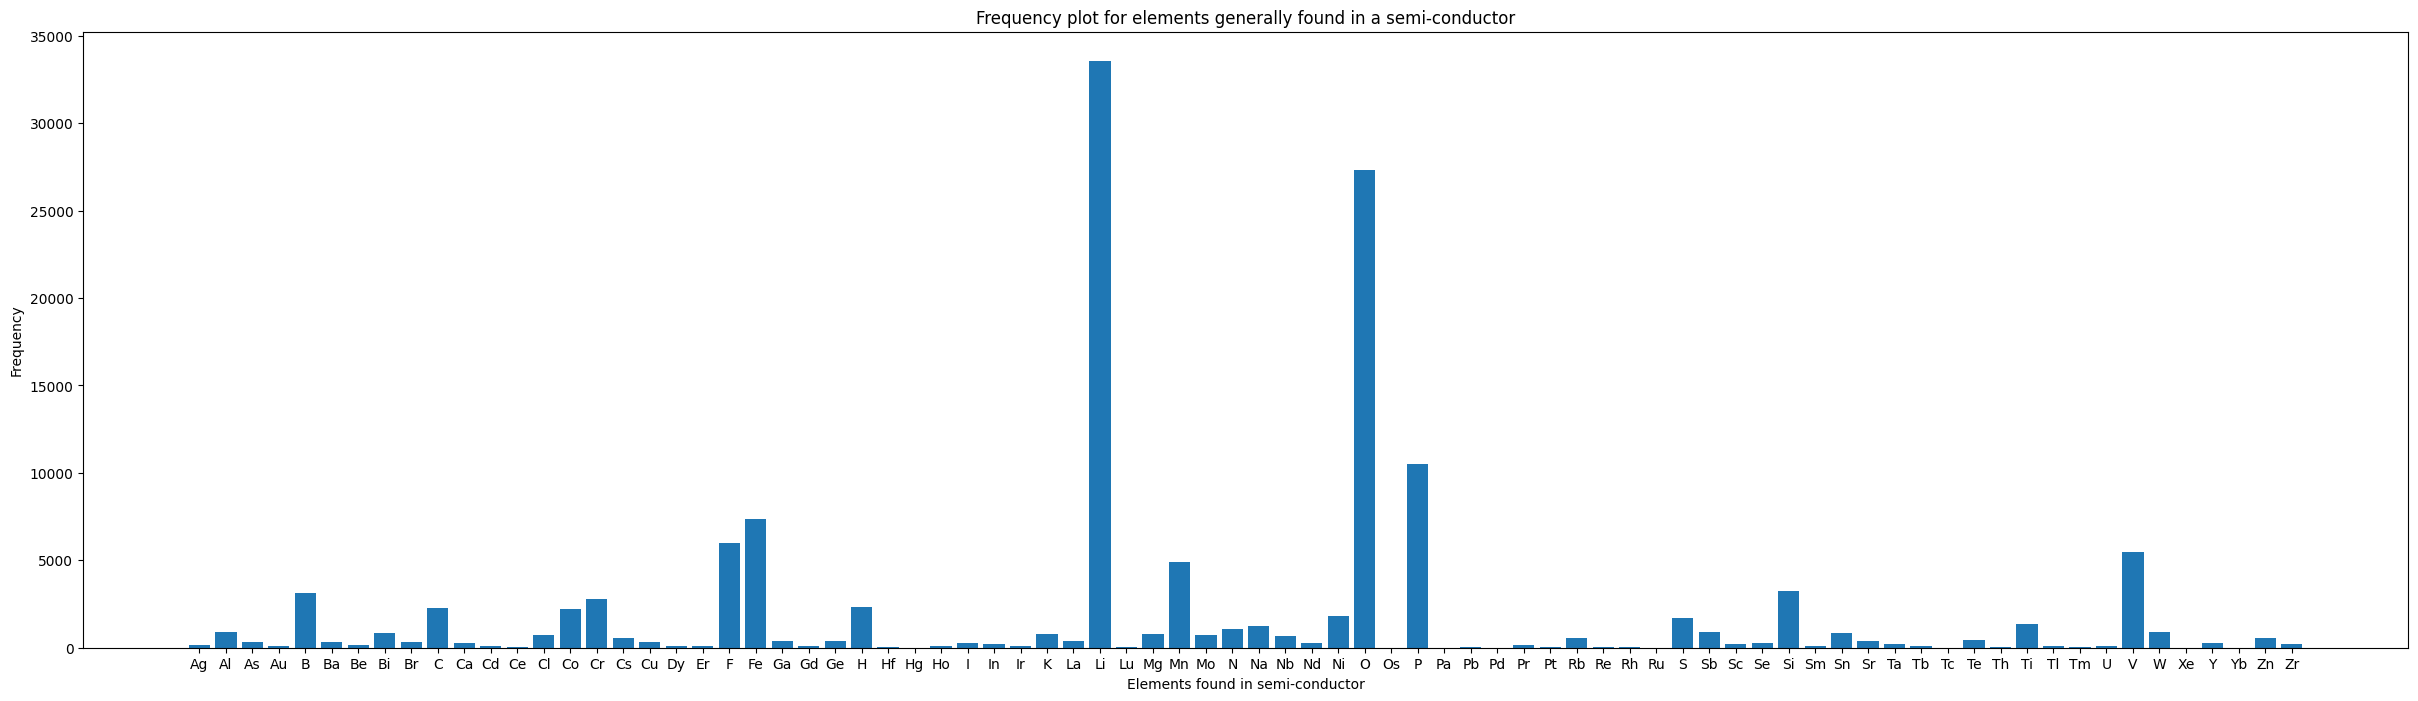

In [140]:
plt.figure(figsize = (30,8))
plt.bar(elem_wit_freq.keys(),elem_wit_freq.values())
plt.title("Frequency plot for elements generally found in a semi-conductor")
plt.xlabel("Elements found in semi-conductor")
plt.ylabel("Frequency")

# We can easily see from the plot that the occurance of Lithium and Oxygen are found to be much higher in semi-conductors

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'n_elements'),
  Text(1.5, 0, 'formation_energy_per_atom'),
  Text(2.5, 0, 'energy_per_atom'),
  Text(3.5, 0, 'band_gap'),
  Text(4.5, 0, 'density'),
  Text(5.5, 0, 'volume'),
  Text(6.5, 0, 'No_of_Atoms')])

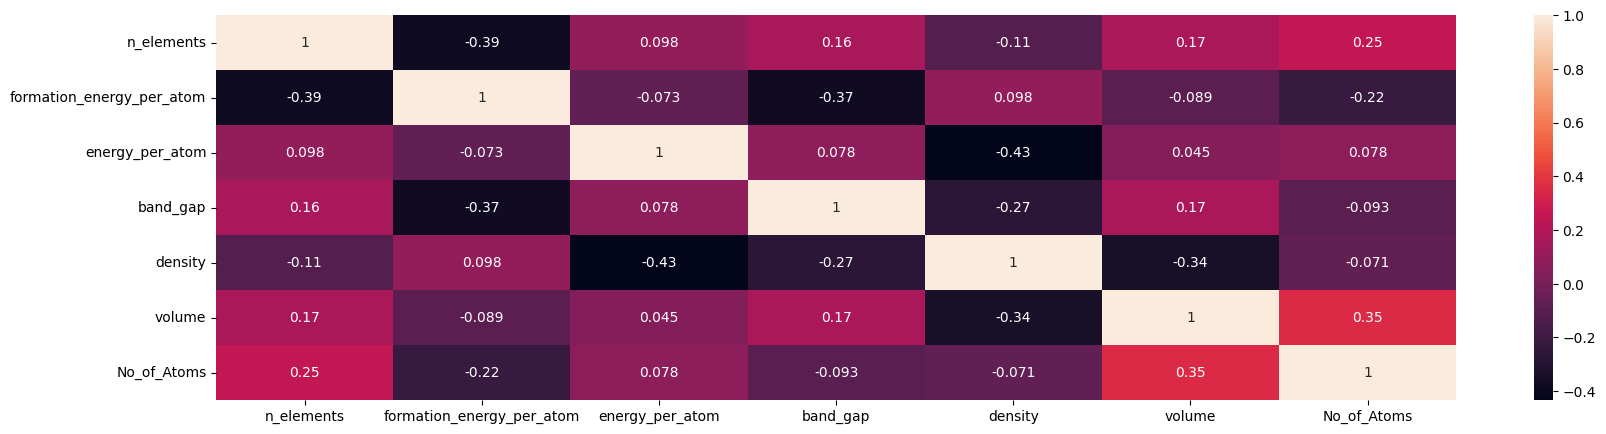

In [141]:
import seaborn as sns
plt.figure(figsize=(20,5))
sns.heatmap(df.select_dtypes([float,int]).corr(),annot=True)
plt.xticks(rotation = 0)

In [142]:
# Checking for Class Imbalance
df[df["is_semiconductor"]==1].size/df[df["is_semiconductor"]==0].size    # Class 1 is 62277 % of Class 2

0.6277694610778443

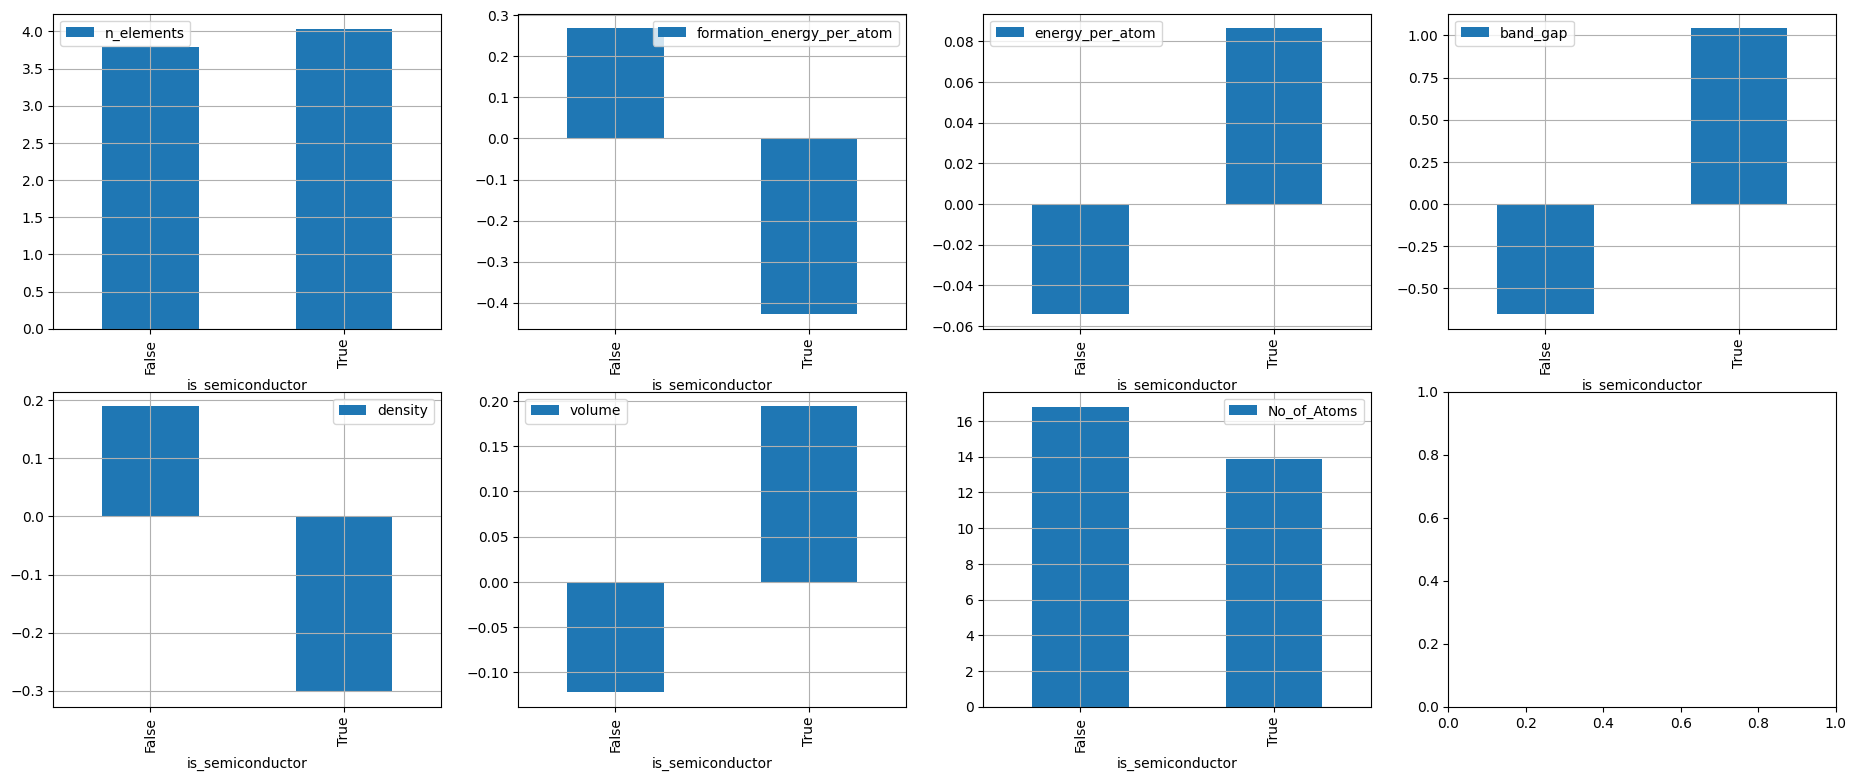

In [143]:
fig,axes = plt.subplots(2,4,figsize=(23,9))
axes = axes.flatten()

for i in range(df.select_dtypes([float,int]).columns.size):
    df.groupby("is_semiconductor")[[df.select_dtypes([float,int]).columns[i]]].mean().plot(kind='bar',grid=True,ax = axes[i])

<Axes: xlabel='contains_transition_metal'>

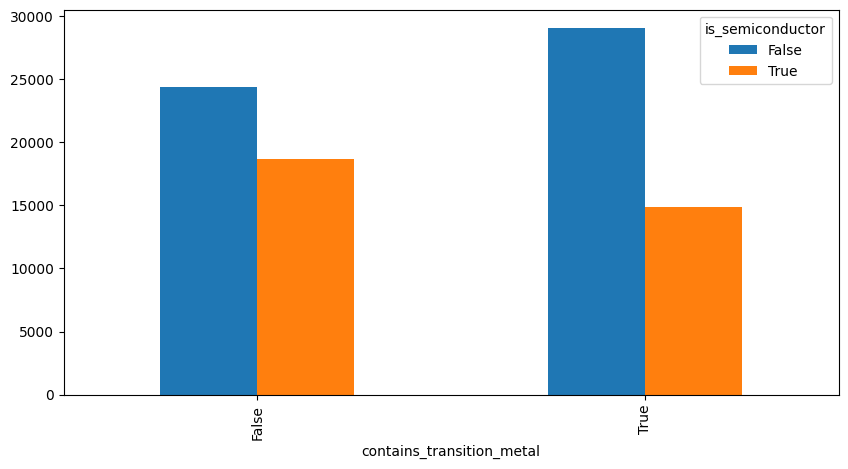

In [144]:
pd.crosstab(df["contains_transition_metal"],df["is_semiconductor"]).plot(kind='bar',figsize=(10,5))

In [145]:
features = df.drop(["elements","is_semiconductor"],axis = 1)
target = df["is_semiconductor"]

<Axes: >

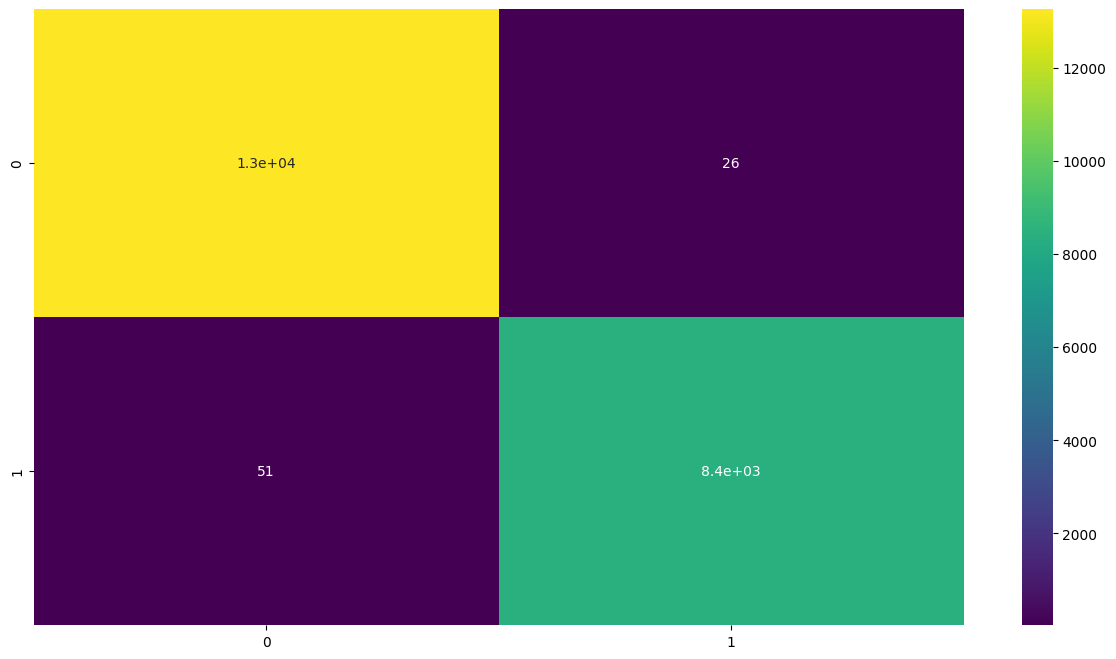

In [151]:
model1 = RandomForestClassifier(n_estimators=1)
x1,x2,y1,y2 = train_test_split(features,target,shuffle = True)
model1.fit(x1,y1)
cm = confusion_matrix(y2,model1.predict(x2))
plt.figure(figsize = (15,8))
sns.heatmap(cm,cmap = 'viridis',annot=True)


In [152]:
print(classification_report(y2,model1.predict(x2)))


              precision    recall  f1-score   support

       False       1.00      1.00      1.00     13288
        True       1.00      0.99      1.00      8459

    accuracy                           1.00     21747
   macro avg       1.00      1.00      1.00     21747
weighted avg       1.00      1.00      1.00     21747



<BarContainer object of 8 artists>

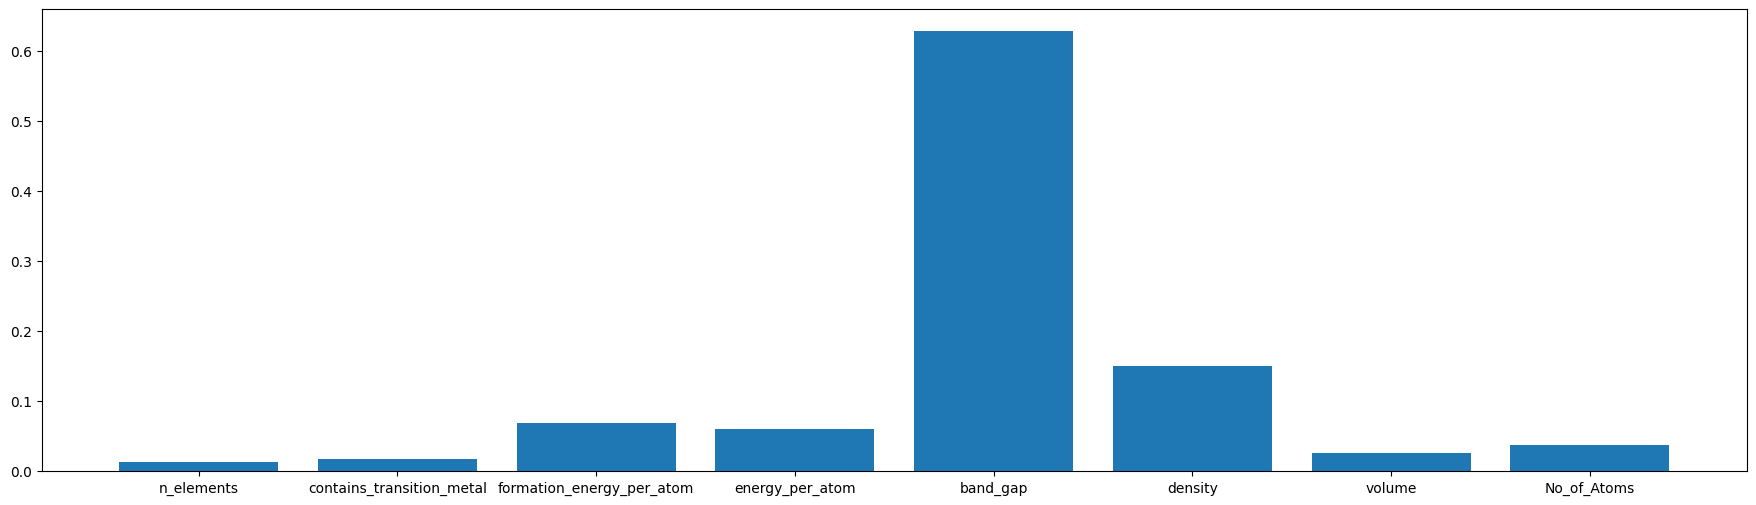

In [153]:
plt.figure(figsize = (22,6))
plt.bar(model1.feature_names_in_,model1.feature_importances_)

In [154]:
model2 = LogisticRegression(penalty = 'l1',solver='liblinear')
model2.fit(x1,y1)
print(classification_report(y2,model2.predict(x2)))

              precision    recall  f1-score   support

       False       0.99      1.00      0.99     13288
        True       0.99      0.98      0.99      8459

    accuracy                           0.99     21747
   macro avg       0.99      0.99      0.99     21747
weighted avg       0.99      0.99      0.99     21747



<Axes: >

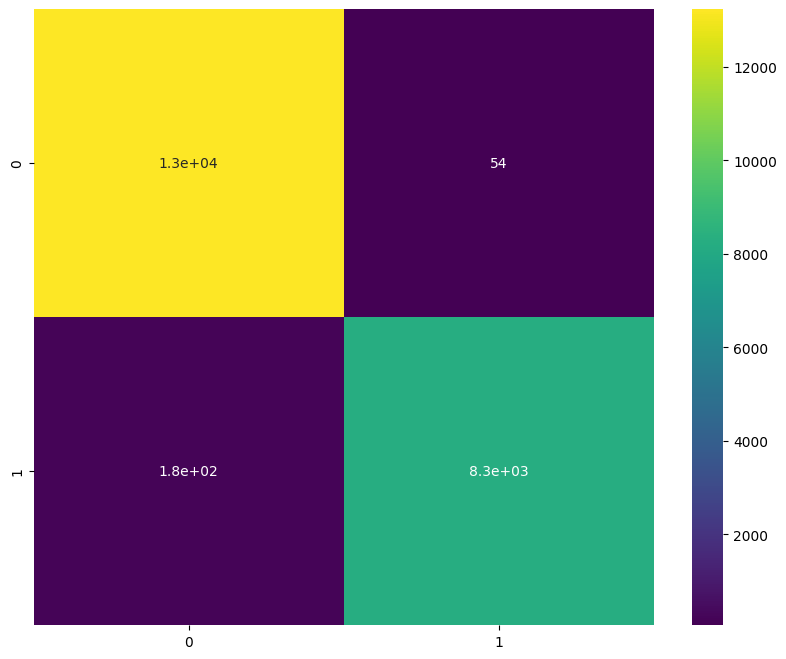

In [155]:
plt.figure(figsize = (10,8))
cm = confusion_matrix(y2,model2.predict(x2))
sns.heatmap(cm,cmap = 'viridis',annot=True)


# We can easily observe that the band gap is a clear indicator of a semi-conductor , hence we are dropping it to make the model predict using less important features

In [156]:
features = df.drop(["elements","is_semiconductor","band_gap"],axis = 1)
target = df["is_semiconductor"]
features = StandardScaler().fit_transform(features)
features

array([[-2.52616394, -1.01012158,  1.72035864, ..., -1.18186228,
        -0.91199729, -0.54901408],
       [-2.52616394, -1.01012158,  1.71913747, ..., -1.23752795,
        -0.89771945, -0.54901408],
       [-2.52616394, -1.01012158,  1.90252969, ..., -2.35216636,
         4.28905515, -0.87840208],
       ...,
       [-1.18680496, -1.01012158,  2.11725046, ..., -1.96623695,
         2.9556216 ,  9.00323793],
       [-1.18680496, -1.01012158,  2.09709723, ..., -0.81432776,
        10.18951864,  9.25027893],
       [-1.18680496,  0.98997984, -0.07922306, ..., -0.83973405,
         3.68599214, 13.12058794]])

I try to implement a  modified Gradient Boosting approach, where a Neural Network is used to correct the errors of a baseline Linear Model.
1. Baseline Prediction : I train a Logistic Regression model $L(x)$ to predict the probability of a material being a semiconductor ($y \in \{0, 1\}$).$$P_{LR} = \sigma(w^T x + b)$$
2. Residual Calculation : I calculated the Residuals ($r$), which represent the "information gap" that the linear model failed to capture.$$r = y - P_{LR}$$3. Residual Learning (ANN) : I trained an Artificial Neural Network $N(x)$ to map the input physical features to these residuals. Unlike standard classification, the ANN uses a Linear Activation at the output to perform regression on the error terms.$$\hat{r} = N(x)$$4. Weighted Ensemble (The $k$ Factor) : The final prediction $P_{final}$ is a weighted combination of the base model and the neural correction. We optimize the hyperparameter $k$ to find the ideal "learning rate" using 5 Fold Stratified Cross Validation for the correction.$$P_{final} = P_{LR} + (k \cdot \hat{r})$$

In [157]:
model3 = LogisticRegression(penalty = 'l2',solver='liblinear')
x1,x2,y1,y2 = train_test_split(features,target,shuffle = True)
model3.fit(x1,y1)
model3.score(x2,y2)

0.7338483468984228

In [158]:
def simple_nn(x,y,ep):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128,input_shape = (features[0].size,),activation = 'relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(50,activation='relu'),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(50,activation='relu'),
        tf.keras.layers.Dense(1,activation = 'linear')    # We are predicting residuals which are continuous values
    ])

    model.compile(
        optimizer = 'adam',
        metrics = ['mae'],
        loss = [tf.losses.MeanSquaredError]  # We are predicting residuals which are continuous values hence Mean Squared error as loss
    )

    history = model.fit(x,y,epochs = ep,validation_split=0.2 , batch_size=64)
    return model,history

In [102]:
learning_rate = [ 1.11 , 1.12 , 1.13 , 1.14 ]

Xtrain , Xtest ,Ytrain , Ytest = train_test_split(features,target,shuffle = True,train_size = 0.80,stratify=target)

dict = {}

for j in learning_rate:
    dict[j] = []

cv = StratifiedKFold(5)
for train , test in cv.split(Xtrain,Ytrain):
    trainX , testX , trainY , testY = features[train,:] , features[test,:] , target[train] , target[test]
    model3.fit(trainX,trainY)
    residual = trainY - model3.predict_proba(trainX)[:,1]
    model = simple_nn(trainX,residual,30)
    for k in learning_rate:
        prediction = model3.predict_proba(testX)[:,1] + k * model[0].predict(testX).flatten()   # Neural Network always predicts a 2D data , so flattening it
        dict[k].append(np.sqrt(np.mean((testY - prediction)**2)))


Epoch 1/30
696/696 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.1731 - mae: 0.3488 - val_loss: 0.1318 - val_mae: 0.2710
Epoch 2/30
696/696 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1597 - mae: 0.3234 - val_loss: 0.1295 - val_mae: 0.2762
Epoch 3/30
696/696 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1550 - mae: 0.3141 - val_loss: 0.1270 - val_mae: 0.2671
Epoch 4/30
696/696 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1535 - mae: 0.3117 - val_loss: 0.1240 - val_mae: 0.2608
Epoch 5/30
696/696 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1514 - mae: 0.3068 - val_loss: 0.1203 - val_mae: 0.2458
Epoch 6/30
696/696 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1459 - mae: 0.2962 - val_loss: 0.1193 - val_mae: 0.2460
Epoch 7/30
696/696 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1448 - mae: 0.2938 - val_loss: 0.1170 - val_mae: 0.2429
Epoch 8/30
696/696 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1436 - mae: 0.2914 - val_loss: 0.1149 - val_mae: 0.2378
Epoch 9/30
696/696 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - lo

In [110]:
for i in dict.keys():
    print(i,np.mean(dict[i])/10)

1.11 0.03404741995862905
1.12 0.03405294460102655
1.13 0.03405991919533939
1.14 0.0340683428187631


In [111]:
base_model_rmse = np.sqrt(np.mean((testY - model3.predict_proba(testX)[:,1])**2))
base_model_rmse

np.float64(0.39901432733007963)

# We can see that the RMSE for learning rate 1.12 is much better than base model hence , the residual is minimum for learning rate of 1.12

In [112]:
res = Ytrain - model3.fit(Xtrain,Ytrain).predict_proba(Xtrain)[:,1]

model , history = simple_nn(Xtrain,res,100)

pred = np.clip(model3.predict_proba(Xtest)[:,1] + 1.12 *  model.predict(Xtest).flatten() , 0 , 1)
# Keeping the value within 0 and 1 since adding residuals can incease or decrease beyond that range
pred = [1 if i>0.5 else 0 for i in pred ]


Epoch 1/100
870/870 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.1713 - mae: 0.3433 - val_loss: 0.1541 - val_mae: 0.3155
Epoch 2/100
870/870 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.1581 - mae: 0.3216 - val_loss: 0.1493 - val_mae: 0.3036
Epoch 3/100
870/870 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.1540 - mae: 0.3121 - val_loss: 0.1484 - val_mae: 0.3043
Epoch 4/100
870/870 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.1500 - mae: 0.3041 - val_loss: 0.1449 - val_mae: 0.2951
Epoch 5/100
870/870 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.1482 - mae: 0.3007 - val_loss: 0.1409 - val_mae: 0.2925
Epoch 6/100
870/870 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.1480 - mae: 0.2999 - val_loss: 0.1377 - val_mae: 0.2822
Epoch 7/100
870/870 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.1435 - mae: 0.2914 - val_loss: 0.1353 - val_mae: 0.2798
Epoch 8/100
870/870 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1415 - mae: 0.2876 - val_loss: 0.1326 - val_mae: 0.2724
Epoch 9/100
870/870 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/

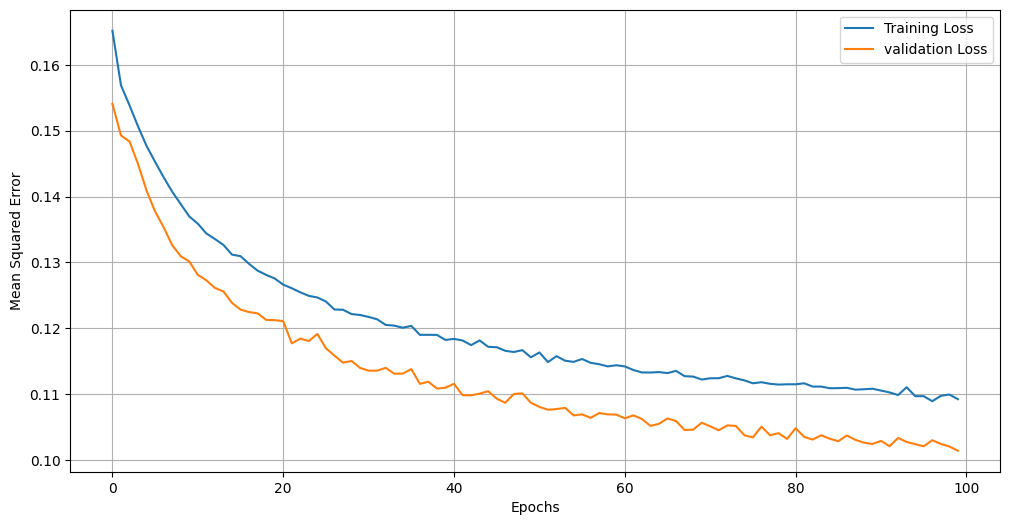

In [119]:
plt.figure(figsize = (12,6))
plt.plot(history.history['loss'],label = 'Training Loss')
plt.plot(history.history['val_loss'] , label = "validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid()

In [120]:
print(classification_report(Ytest,pred))

              precision    recall  f1-score   support

       False       0.89      0.89      0.89     10688
        True       0.82      0.82      0.82      6710

    accuracy                           0.86     17398
   macro avg       0.85      0.85      0.85     17398
weighted avg       0.86      0.86      0.86     17398



<Axes: >

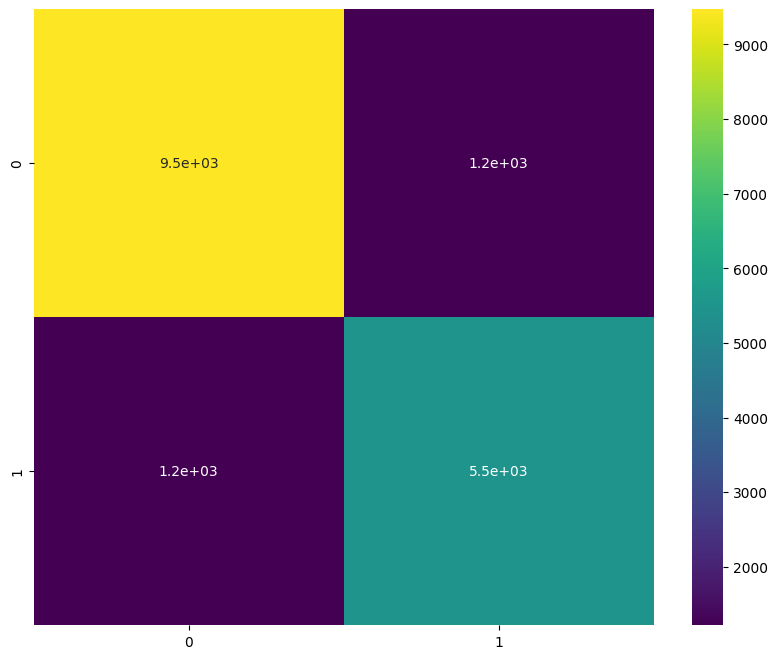

In [115]:
plt.figure(figsize = (10,8))
cm = confusion_matrix(Ytest,pred)
sns.heatmap(cm,cmap = 'viridis',annot=True)

0.9988504425796069


<BarContainer object of 7 artists>

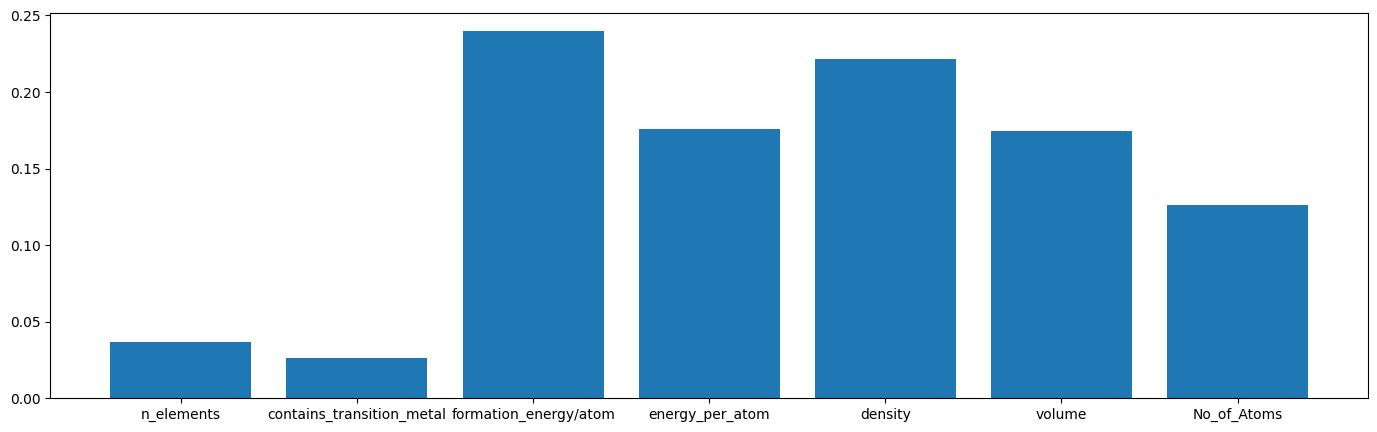

In [164]:
print(RandomForestClassifier(10).fit(Xtrain , Ytrain).score(Xtest,Ytest))
plt.figure(figsize = (17,5))
plt.bar(['n_elements', 'contains_transition_metal',
       'formation_energy/atom', 'energy_per_atom',
       'density', 'volume', 'No_of_Atoms'], RandomForestClassifier(10).fit(Xtrain , Ytrain).feature_importances_)

In this materials science classification task, the Random Forest achieved 99% accuracy, significantly outperforming the Logistic Regression + ANN hybrid (~86%). The reasoning lies in the nature of physical data:

1. Phase Space vs. Linear Slopes
Physical properties like Formation Energy and Density do not relate to semiconductor status linearly.

Logistic Regression tries to fit a smooth, straight line through the data.

Random Forest uses "if-then" logic to create precise boundaries, effectively recreating a Physical Phase Diagram.

2. High-Order Interactions
Properties such as Volume and Energy per Atom are interdependent.

The Hybrid struggles because the ANN only sees the "leftovers" (residuals) of a linear guess, which are often noisy and disconnected.

Random Forest captures these interactions naturally by nesting features (e.g., "If Density > X AND Volume < Y"), allowing it to identify specific crystal structures with high precision.

3. Non-Linear Feature Importance
As shown by the feature_importances_, the model relies heavily on Formation Energy (28%) and Energy per Atom (17%). These features likely have "jagged" importance—meaning a small change in value can lead to a total change in material type—which tree-based models handle far better than neural networks trained on residuals.